In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

# Load the data
customers_link = "https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_link = "https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_link = "https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

customers = pd.read_csv(customers_link)
products = pd.read_csv(products_link)
transactions = pd.read_csv(transactions_link)

# Preprocessing: convert dates to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merging datasets to combine all information
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

# Feature engineering: aggregating features by customer
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending by each customer
    'Quantity': 'sum',  # Total quantity of items purchased by each customer
    'Price_x': 'mean',  # Average price of items purchased by each customer
    'ProductID': 'nunique'  # Number of unique products bought by each customer
}).reset_index()

# Renaming columns
customer_features.columns = ['CustomerID', 'TotalSpent', 'TotalQuantity', 'AvgPrice', 'UniqueProducts']

C:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


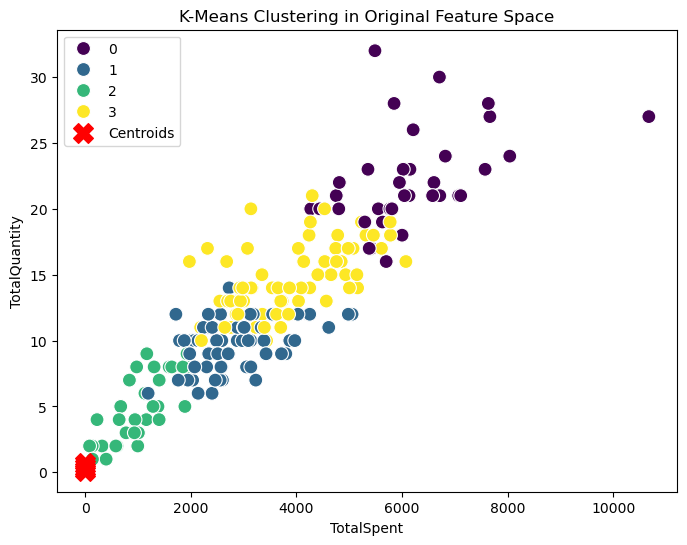

In [3]:
# Scaling the features for clustering
scaler = MinMaxScaler()
clustering_features = customer_features.iloc[:, 1:]
clustering_scaled = scaler.fit_transform(clustering_features)

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(clustering_scaled)

# Adding cluster labels to the data
customer_features['Cluster'] = clusters

# K-Means plot (clusters in original feature space)
plt.figure(figsize=(8, 6))

# Plotting the clusters (use 'TotalSpent' and 'TotalQuantity' for the x and y axis)
sns.scatterplot(x=customer_features['TotalSpent'], y=customer_features['TotalQuantity'], hue=clusters, palette='viridis', s=100)

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroids")

plt.title("K-Means Clustering in Original Feature Space")
plt.xlabel("TotalSpent")
plt.ylabel("TotalQuantity")
plt.legend()
plt.show()



Davies-Bouldin Index: 1.1548549413115077


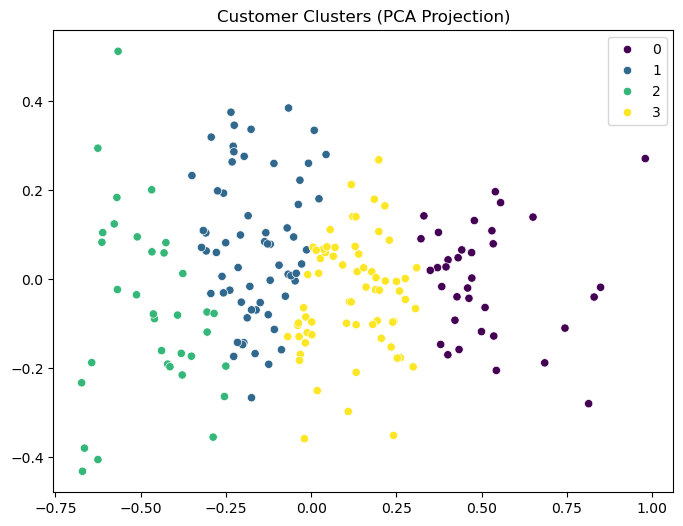

In [5]:
# Evaluating clustering with Davies-Bouldin Index
db_index = davies_bouldin_score(clustering_scaled, clusters)
print("Davies-Bouldin Index:", db_index)

# PCA for visualization (reduce to 2 dimensions)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(clustering_scaled)

# Plotting the clusters using PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis')
plt.title("Customer Clusters (PCA Projection)")
plt.show()

